<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/sklearn/sklearn_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

Feature extraction and normalization.

Applications: Transforming input data such as text for use with machine learning algorithms.
Algorithms: preprocessing, feature extraction, and more...

[Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [1]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


In [0]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

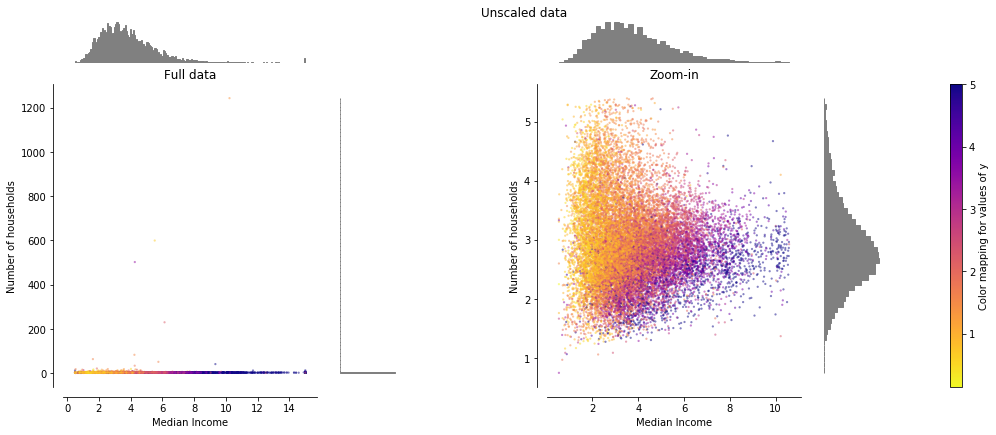

In [3]:
make_plot(0)

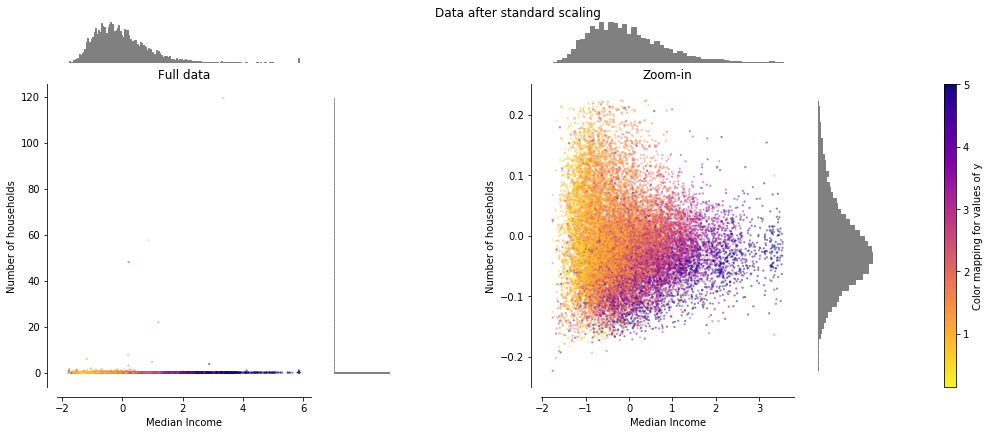

In [4]:
make_plot(1)

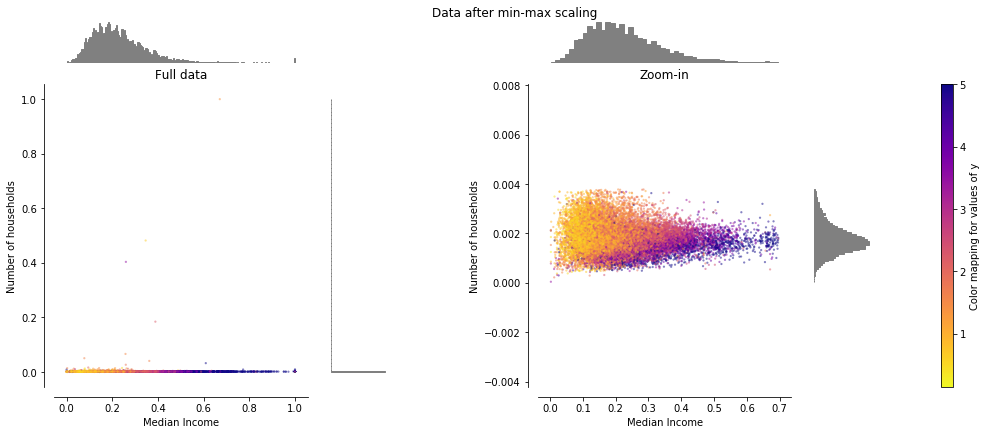

In [5]:
make_plot(2)

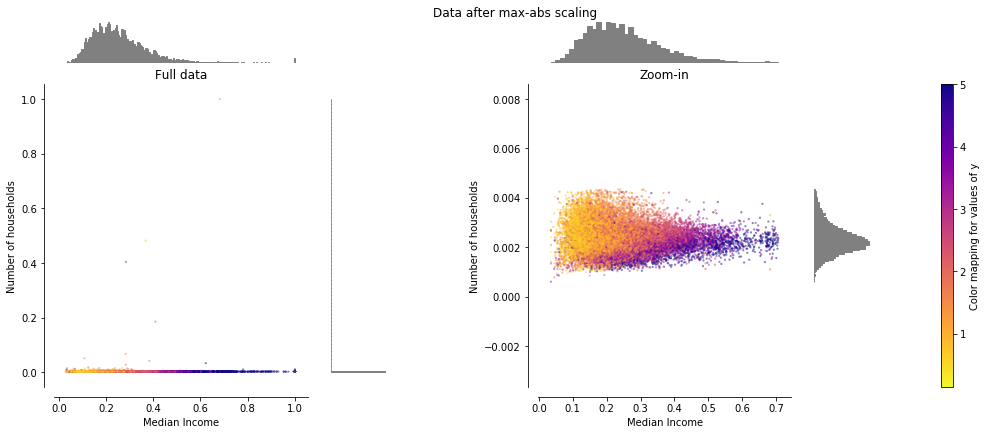

In [6]:
make_plot(3)

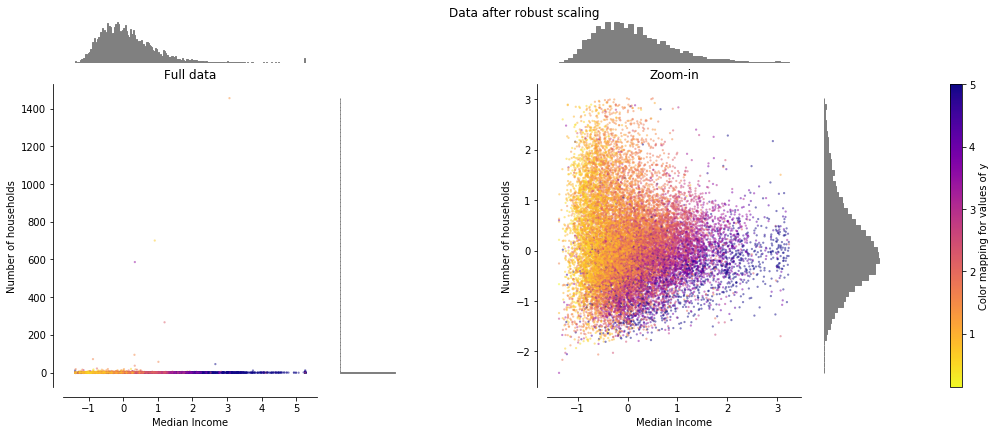

In [7]:
make_plot(4)

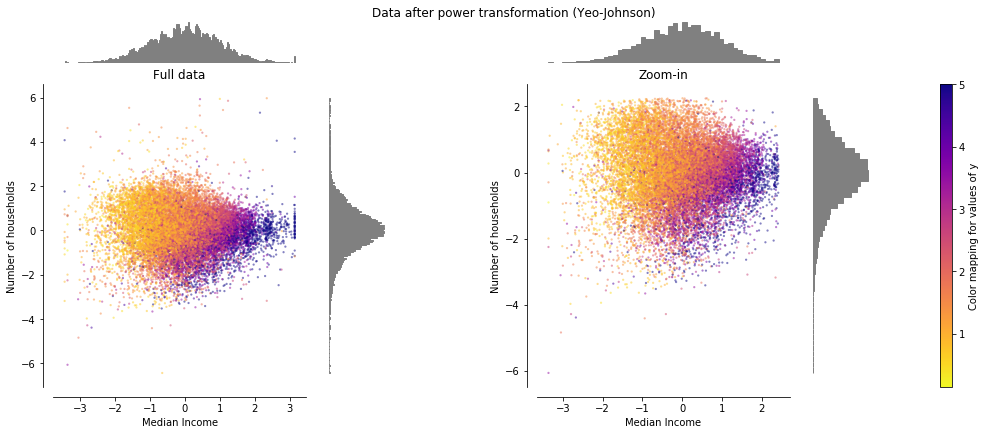

In [8]:
make_plot(5)

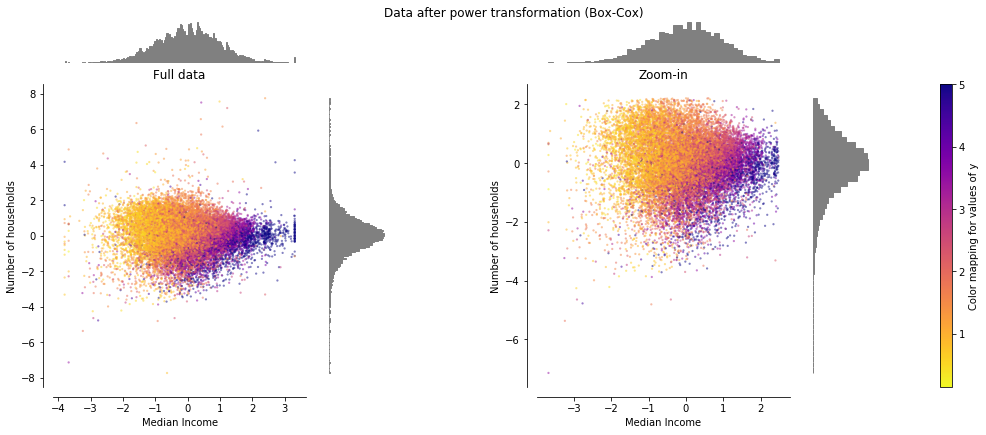

In [9]:
make_plot(6)

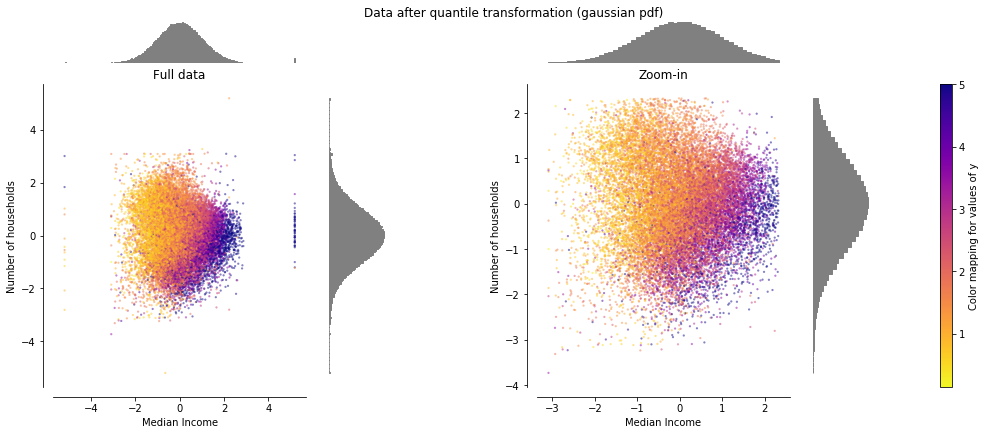

In [10]:
make_plot(7)

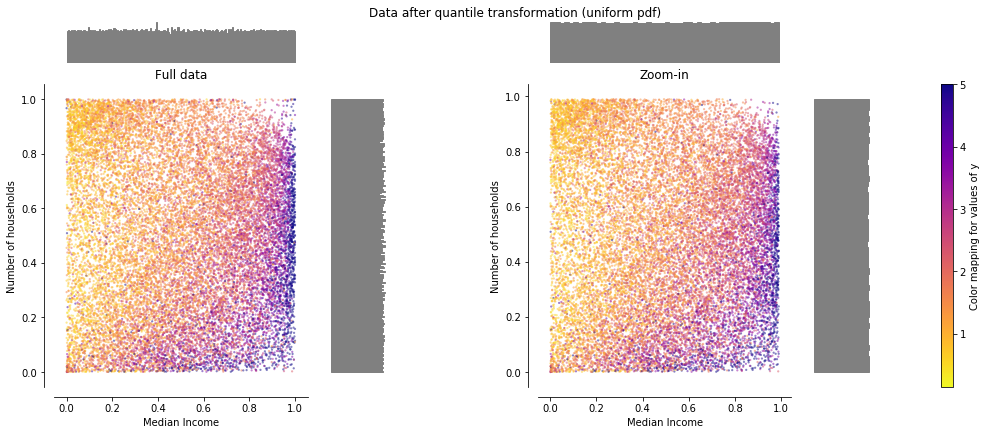

In [11]:
make_plot(8)

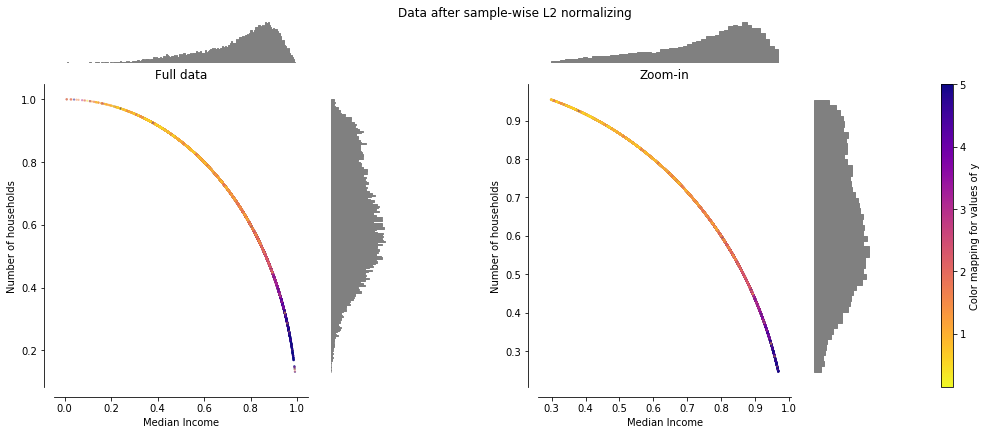

In [12]:
make_plot(9)

[Practical Guide on Data Preprocessing in Python using Scikit Learn](https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/)



In [15]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax


array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [17]:
print(X_train_minmax.mean(axis=0))
print(X_train_minmax.std(axis=0))

[0.5        0.5        0.44444444]
[0.40824829 0.40824829 0.41573971]


In [18]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
print(scaler.mean_)
print(scaler.scale_  )
scaler.transform(X_train) 

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

你也可以通过在构造函数 :class:StandardScaler 中传入参数 with_mean=False 或者with_std=False 来取消中心化或缩放操作。

In [21]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)  

array([[-2.44948974,  1.22474487, -0.26726124]])

## MinMaxScaler [0,1]

In [23]:
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)
X_test = np.array([[ -3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax


[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


array([[-1.5       ,  0.        ,  1.66666667]])

In [24]:
print(min_max_scaler.scale_ )
print(min_max_scaler.min_)

[0.5        0.5        0.33333333]
[0.         0.5        0.33333333]


## MaxAbsScaler [-1:1]

类 MaxAbsScaler 的工作原理非常相似，但是它只通过除以每个特征的最大值将训练数据特征缩放至 [-1, 1] 范围内，这就意味着，训练数据应该是已经零中心化或者是稀疏数据。

In [25]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs                # doctest +NORMALIZE_WHITESPACE^

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [26]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
print(X_test_maxabs)                 
print(max_abs_scaler.scale_)         


[[-1.5 -1.   2. ]]
[2. 1. 2.]


## Normalize

归一化 是 缩放单个样本以具有单位范数 的过程。如果你计划使用二次形式(如点积或任何其他核函数)来量化任何样本间的相似度，则此过程将非常有用。

这个观点基于 向量空间模型(Vector Space Model) ，经常在文本分类和内容聚类中使用.

In [27]:
X = [[ 1., -1.,  2.],
      [ 2.,  0.,  0.],
      [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized                                      

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [28]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [29]:
print(normalizer.transform(X)   )
normalizer.transform([[-1.,  1., 0.]]) 

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


array([[-0.70710678,  0.70710678,  0.        ]])

## 类别特征编码

要把标称型特征(categorical features) 转换为这样的整数编码(integer codes), 我们可以使用 OrdinalEncoder 。 这个估计器把每一个categorical feature变换成 一个新的整数数字特征 (0 到 n_categories - 1):

In [30]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
print(enc.fit(X))  
print(enc.transform([['female', 'from US', 'uses Safari']]))


OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)
[[0. 1. 1.]]


这样的整数特征表示并不能在scikit-learn的估计器中直接使用，因为这样的连续输入，估计器会认为类别之间是有序的，但实际却是无序的。(例如：浏览器的类别数据是任意排序的)。

另外一种将标称型特征转换为能够被scikit-learn中模型使用的编码是one-of-K， 又称为 独热码或dummy encoding。 这种编码类型已经在类OneHotEncoder中实现。该类把每一个具有n_categories个可能取值的categorical特征变换为长度为n_categories的二进制特征向量，里面只有一个地方是1，其余位置都是0。

In [31]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
print(enc.fit(X))  
print(enc.transform([['female', 'from US', 'uses Safari'],
                ['male', 'from Europe', 'uses Safari']]).toarray())

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)
[[1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 1.]]


默认情况下，每个特征使用几维的数值可以从数据集自动推断。而且也可以在属性categories_中找到:

可以使用参数categories_显式地指定这一点。我们的数据集中有两种性别、四种可能的大陆和四种web浏览器:

In [32]:
print(enc.categories_)

[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]


In [33]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
print(enc.fit(X))
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

OneHotEncoder(categorical_features=None,
              categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']],
              drop=None, dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)


array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

如果训练数据可能缺少分类特性，通常最好指定handle_unknown='ignore'，而不是像上面那样手动设置类别。当指定handle_unknown='ignore'，并且在转换过程中遇到未知类别时，不会产生错误，但是为该特性生成的一热编码列将全部为零(handle_unknown='ignore'只支持一热编码):

如果训练数据中可能含有缺失的标称型特征, 通过指定handle_unknown='ignore'比像上面代码那样手动设置categories更好。 当handle_unknown='ignore' 被指定并在变换过程中真的碰到了未知的 categories, 则不会抛出任何错误,但是由此产生的该特征的one-hot编码列将会全部变成 0 。(这个参数设置选项 handle_unknown='ignore' 仅仅在 one-hot encoding的时候有效):

In [34]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
print(enc.fit(X))
print(enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray())

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)
[[1. 0. 0. 0. 0. 0.]]


还可以使用drop参数将每个列编码为n_categories-1列，而不是n_categories列。此参数允许用户为要删除的每个特征指定类别。这对于避免某些分类器中输入矩阵的共线性是有用的。例如，当使用非正则化回归(线性回归)时，这种功能是有用的，因为共线性会导致协方差矩阵是不可逆的。当这个参数不是None时，handle_unknown必须设置为error:

In [35]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
print(drop_enc.categories_)
print(drop_enc.transform(X).toarray())

[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]
[[1. 1. 1.]
 [0. 0. 0.]]


## Binarizer

In [36]:
X = [[ 1., -1.,  2.],
      [ 2.,  0.,  0.],
      [ 0.,  1., -1.]]
binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
print(binarizer)
print(binarizer.transform(X))

Binarizer(copy=True, threshold=0.0)
[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [37]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

# 缺失值处理

5.4.1 单变量与多变量插补

一种类型的插补算法是单变量算法，它只使用第i个特征维度中的非缺失值(如impute.SimpleImputer)来插补第i个特征维中的值。相比之下，多变量插补算法使用整个可用特征维度来估计缺失的值(如impute.IterativeImputer)。

5.4.2 单变量插补

SimpleImputer类提供了计算缺失值的基本策略。缺失值可以用提供的常数值计算，也可以使用缺失值所在的行/列中的统计数据(平均值、中位数或者众数)来计算。这个类也支持不同的缺失值编码。



在Python的sklearn库中存在两个类，它们大致相同：
sklearn.preprocessing.Imputer和sklearn.impute.SimpleImputer
我发现的唯一区别是"constant"strategy键入SimpeImputer。
还有什么不同吗？什么时候应该使用Imputer而不是SimpleImputer？


最佳答案：

Imputer类在0.20中被弃用，并将在0.22中被删除。查看source code了解详细信息。回答你的问题很简单：你应该总是使用SimpleImputer。

以下代码段演示了如何使用包含缺失值的列(轴0)的平均值来替换编码为 np.nan 的缺失值:

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
print(imp.fit([[1, 2], [np.nan, 3], [7, 6]]))
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))    

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)
[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


当使用 'most_frequent' 或 'constant' 策略时，SimpleImputer类还支持以 string values 或 pandas categoricals 表示的分类数据(categorical data)

In [45]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))      

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


在下面的例子里，首先创建了函数对象imp_mean用于插值，fit函数提供了用平均数，中位数等插值方法的数据x，data是真正要处理的数据．最后即取x与data每列的平均值填补data的缺失值．

在实际操作中，经常使用fit_transfrom()函数，即要处理的数据和提供用于处理的数据都是同一个data.


In [49]:
import numpy as np
from sklearn.impute import SimpleImputer
 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
data = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
 
Fit = imp_mean.fit(x)#产生的imp_mean.statistics_      array([7. , 3.5, 6. ])应用到transform上
new_data = imp_mean.transform(data)
 
print(Fit)
print(data)
print(imp_mean.transform(data))
imp_mean.statistics_

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)
[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]
[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


array([7. , 3.5, 6. ])

## 5.4.5 标记缺失值
MissingIndicator转换器用于将数据集转换为相应的二进制矩阵，以指示数据集中缺失值的存在。这个变换与归算结合起来是有用的。当使用插补时，保存关于哪些值丢失的信息可以提供有用的信息。

NaN通常用作缺少值的占位符。但是，它强制数据类型为浮点数。参数missing_values允许指定其他占位符，如整数。 在以下示例中，我们将使用-1作为缺失值

In [39]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
               [4, -1, 0, -1],
               [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

参数features用于选择构造掩码的特征。默认情况下，它是 'missing-only',在fit时返回包含缺失值的特征的输入掩码

In [40]:
indicator.features_

array([0, 1, 3])

参数features可以设置为'all'以返回所有特征，无论它们是否包含缺失的值

In [41]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
print(mask_all)
print( indicator.features_)

[[ True  True False False]
 [False  True False  True]
 [False  True False False]]
[0 1 2 3]


当在 Pipeline 中使用 MissingIndicator时, 务必使用FeatureUnion 或ColumnTransformer来添加 indicator features 到 regular features中. 首先，我们在iris数据集上插补一些缺失值:

In [0]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(np.bool)
X[mask] = np.nan
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100,random_state=0)

现在我们创建一个FeatureUnion。为了使分类器能够处理这些数据，所有的特征都将使用SimpleImputer进行估算。 此外，它还从 MissingIndicator中添加指示变量。

In [43]:
transformer = FeatureUnion(
     transformer_list=[
         ('features', SimpleImputer(strategy='mean')),
         ('indicators', MissingIndicator())])
transformer = transformer.fit(X_train, y_train)
results = transformer.transform(X_test)
results.shape

(100, 8)

当然，我们不能用transformer来做任何预测。我们应该用分类器(例如，DecisionTreeClassifier)将其封装在pipeline中， 以便能够进行预测。

In [44]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
results = clf.predict(X_test)
results.shape

(100,)